# Figure 2

In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


## a) Effective connectivity matrix and weighted in-/out-degree

Effective connectivity matrix:

In [2]:
ec = matrices.ConnectivityMatrix('effective', exc_regions='adysgranular', dataset='mics', exc_contra=False)

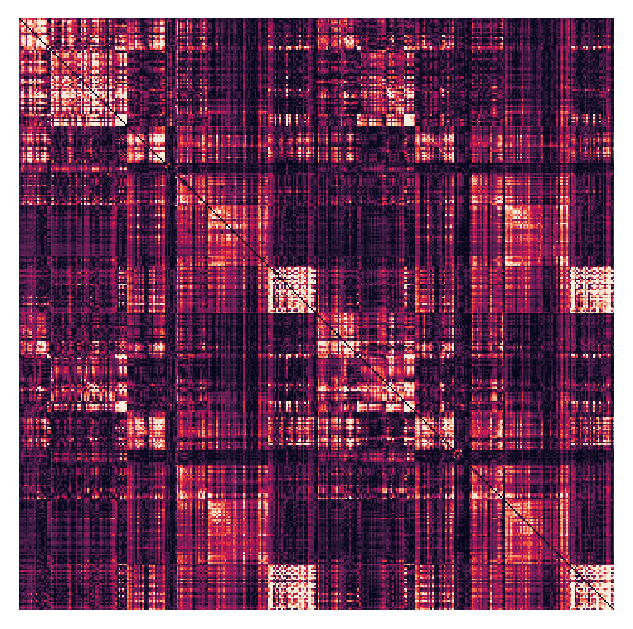

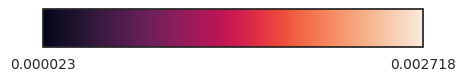

In [3]:
ec.plot()

Weighted in-degree (afferent strength):

(0.0, 1.0, 359.0, 0.0)

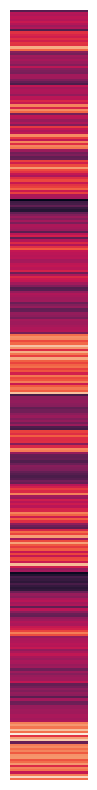

In [4]:
fig, ax = plt.subplots(figsize=(1, 10))
sns.heatmap(ec.matrix.sum(axis=1).values[:, np.newaxis], ax=ax, cbar=False)
ax.axis('off')

Weighted out-degree (efferent strength):

(0.0, 1.0, 359.0, 0.0)

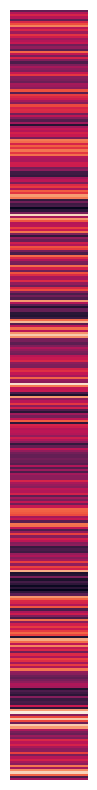

In [5]:
fig, ax = plt.subplots(figsize=(1, 10))
sns.heatmap(ec.matrix.sum(axis=0).values[:, np.newaxis], ax=ax, cbar=False)
ax.axis('off')

## b) Asymmetry-based hierarchy map in association with LTC G1

Asymmetry-based hierarchy:

In [6]:
ec_maps = surfaces.EffectiveConnectivityMaps(dataset='mics')

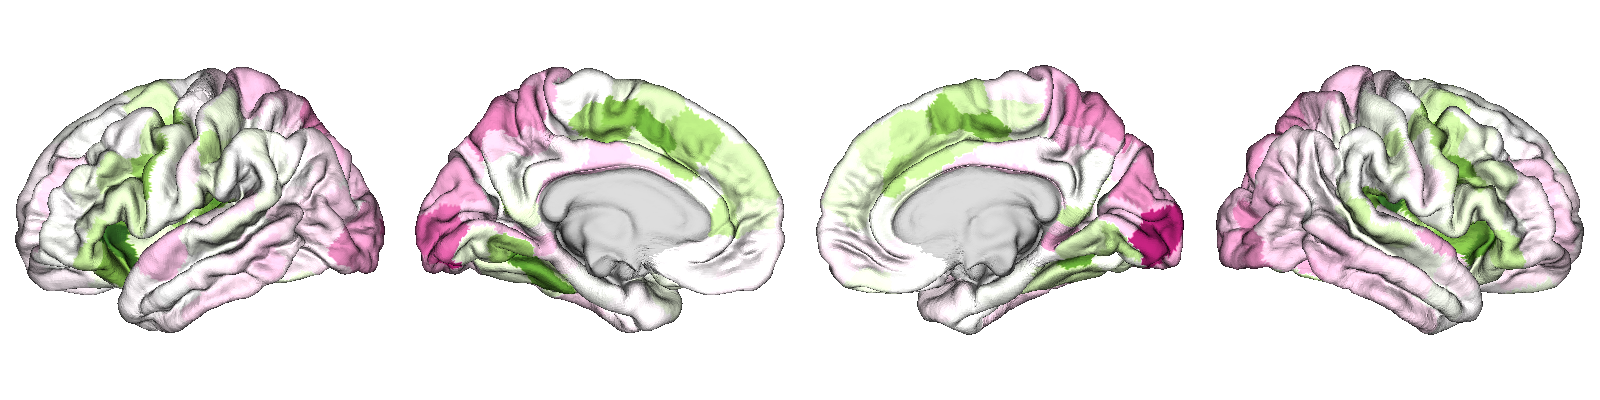

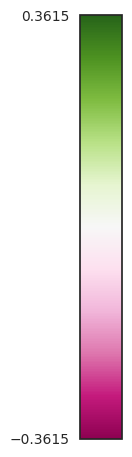

In [7]:
hierarchy_surf = helpers.deparcellate(ec_maps.parcellated_data.loc[:, 'hierarchy'], 'schaefer400', space='fsaverage', downsampled=False)
helpers.plot_surface(hierarchy_surf, cmap='PiYG', vrange='sym', layout_style='row', cbar=True, plot_downsampled=False, space='fsaverage', inflate=False)

Correlation of LTC G1 with asymmetry-based hierarchy:

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_organization/code/../output/connectivity/ec_parc-schaefer400_data-mics/maps/variogram_surrogates_hierarchy_nperm-1000_nparcels-359.npz and have the same pa

,hierarchy
LTC G1,-0.391229



p-value


,hierarchy
LTC G1,0.0


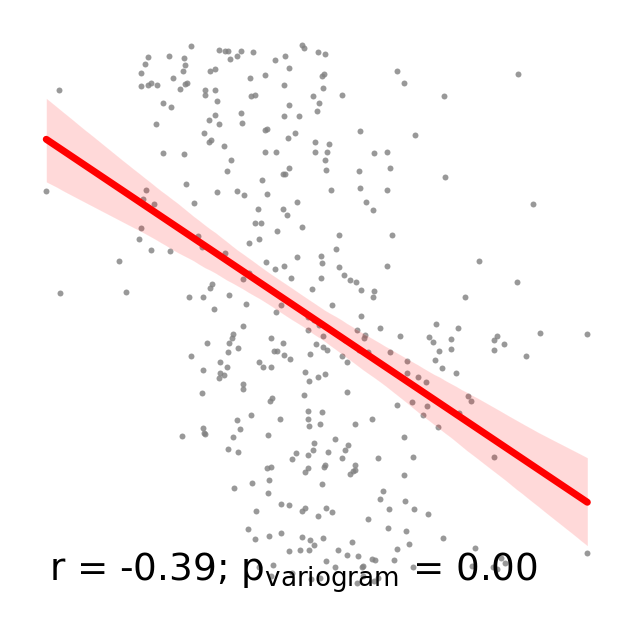

In [8]:
ltcg = surfaces.MicrostructuralCovarianceGradients(matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer400'))
r, p = ec_maps.correlate(ltcg, y_columns=['LTC G1'], x_columns=['hierarchy'], n_perm=1000, axis_off=True)
print("\nCorrelation coefficient")
display(r)
print("\np-value")
display(p)

## c) Laminar-based hierarchy

Macaque laminar-based hierarchy map:

In [9]:
macaque_hierarchy = surfaces.MacaqueHierarchy()

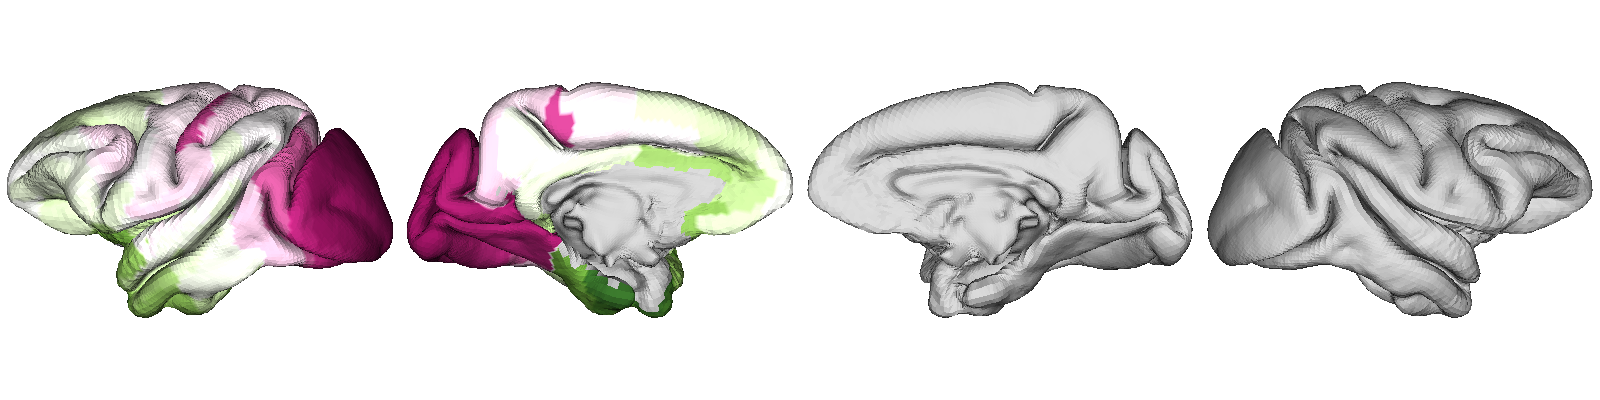

In [10]:
helpers.plot_surface(macaque_hierarchy.surf_data, space='yerkes', cmap='PiYG', vrange=(0, 1), inflate=False)

BigBrain non-parcellated LTC G1 transformed to macaque space:

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/brainspace/plotting/surface_plotting.py:437: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(


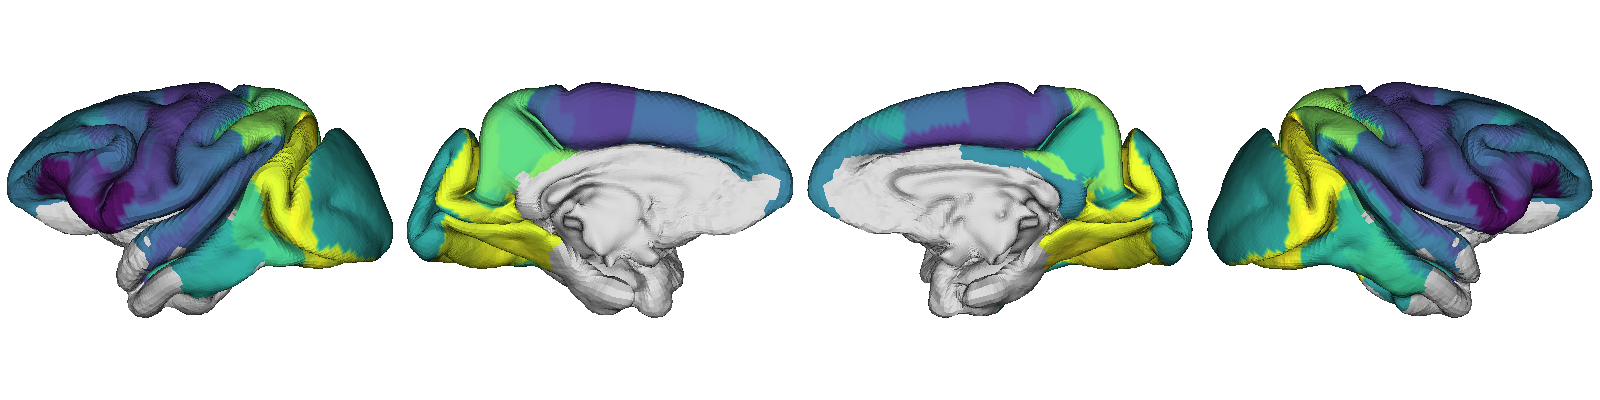

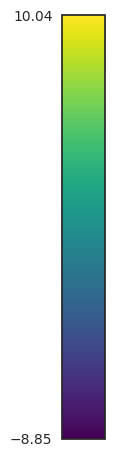

In [2]:
ltcg_nonparc = surfaces.MicrostructuralCovarianceGradients(matrices.MicrostructuralCovarianceMatrix('thickness', None))
ltcg_macaque = surfaces.MacaqueSurface(ltcg_nonparc, ['LTC G1'])
helpers.plot_surface(ltcg_macaque.surf_data, space='yerkes', inflate=False, cbar=True)

Correlation of laminar-based hierarchy and LTC G1 in macaque space:

Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_organization/code/../output/macaque_hierarchy/variogram_surrogates_Laminar-based hierarchy_nperm-1000_nparcels-91.npz and have the same parcels

Correlation coefficient


,Laminar-based hierarchy
LTC G1,-0.53972



p-value


,Laminar-based hierarchy
LTC G1,0.0


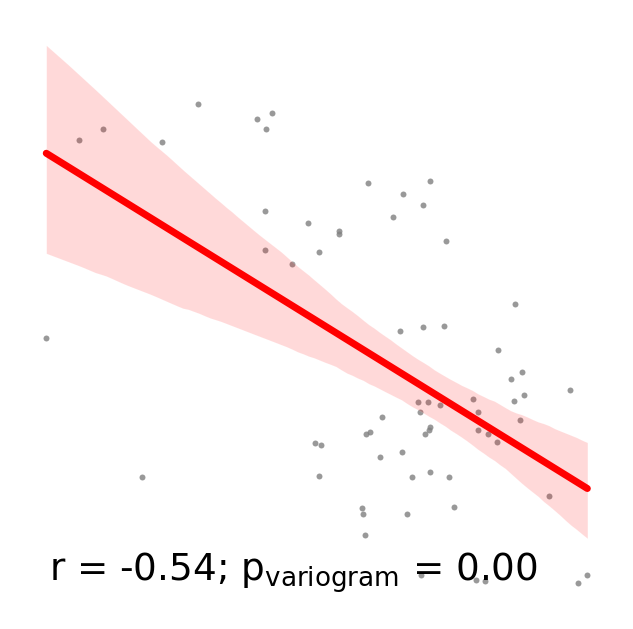

In [12]:
r, p = macaque_hierarchy.correlate(ltcg_macaque, n_perm=1000, axis_off=True)
print("\nCorrelation coefficient")
display(r)
print("\np-value")
display(p)